# MagnaTagATune Dataset Exploration

#### This notebook provides insights into the label distribution of the training and testing splits of the MagnaTagATune Dataset.

Begin by importing all required libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load the annotations CSV file and display the total number of tags.

In [2]:
# Load the annotations CSV file
annotations_file_path = "../data/mtt/annotations.csv"
annotations_df = pd.read_csv(annotations_file_path, delimiter='\t')

# Extract the tag names (all columns except clip_id and mp3_path)
tag_names = annotations_df.columns[1:-1].tolist()
print("Number of tag names:", len(tag_names))

Number of tag names: 188


Load the training and testing label files and display their shapes.

In [3]:
# Load the labels files (both Microsoft and LAION-AI versions can be used, as the same seed was used to generate the splits)
train_labels_file_path = "../scripts/baseline/mtt_ms_embeddings/train_labels.npy"
test_labels_file_path = "../scripts/baseline/mtt_ms_embeddings/test_labels.npy"
train_labels = np.load(train_labels_file_path)
test_labels = np.load(test_labels_file_path)

# Print the shapes of labels and the number of tags
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_labels: (19395, 188)
Shape of test_labels: (6465, 188)


Create functions to obtain and plot the sorted label distributions.

In [4]:
# Get the sorted distribution of labels
def get_sorted_label_distribution(labels):
    # Calculate the number of occurrences for each label
    label_counts = np.sum(labels, axis=0)
    
    # Get sorted indices based on label counts (most frequent first)
    sorted_indices = np.argsort(label_counts)[::-1]
    sorted_counts = label_counts[sorted_indices]
    
    return sorted_counts, sorted_indices

In [5]:
# Plot the sorted distribution for the top 50 labels (Train dataset)
def plot_sorted_label_distribution(sorted_counts, sorted_tag_names=None, label_type="Train"):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_counts)), sorted_counts)
    if sorted_tag_names:
        plt.xticks(range(len(sorted_counts)), sorted_tag_names, rotation=90, fontsize=8)
    plt.title(f'Sorted {label_type} Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Retrieve and plot the sorted label distributions for both the training and testing sets.

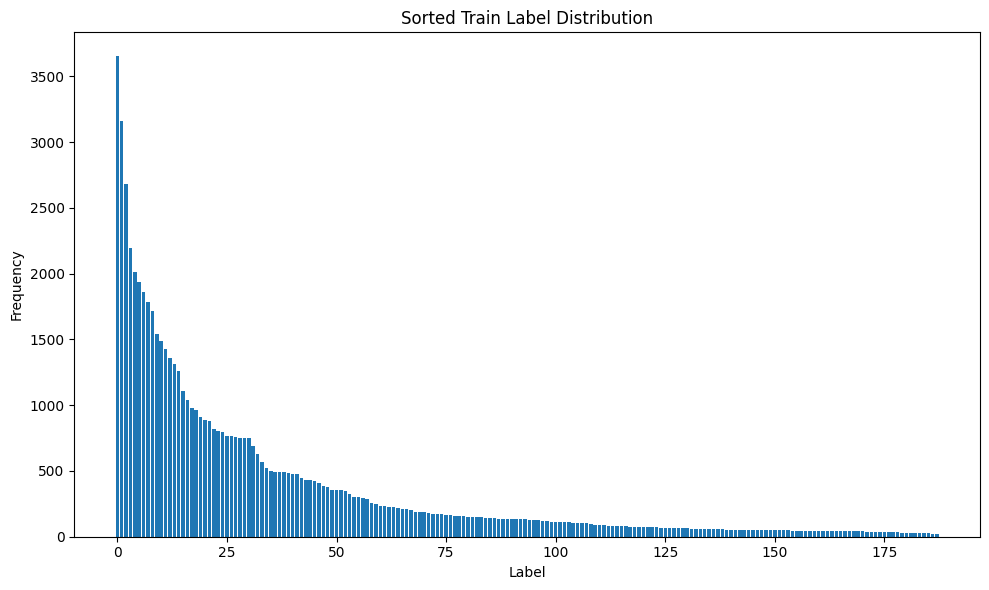

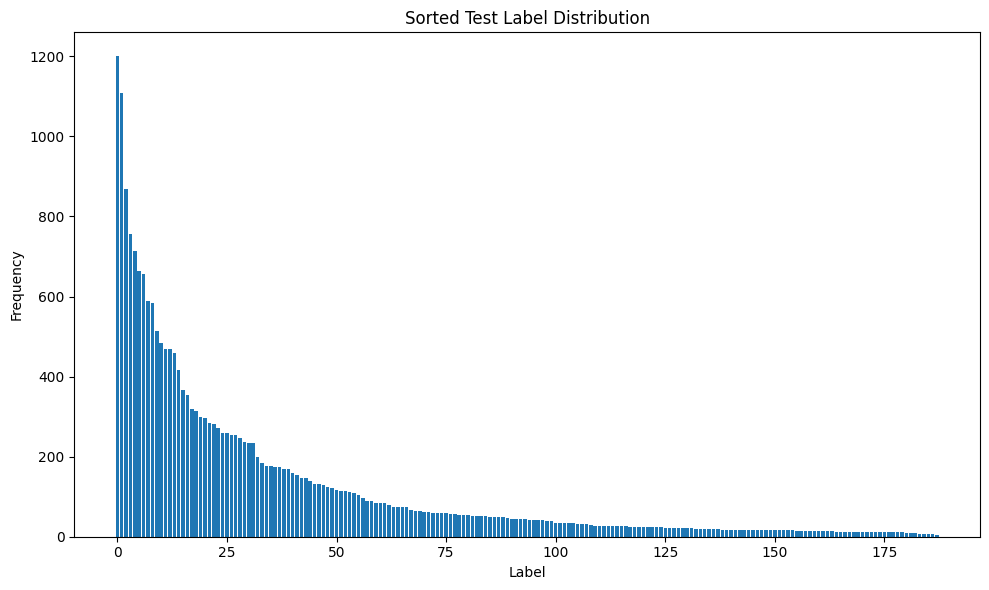

In [6]:
# Get sorted distributions for both train and test labels
train_sorted_counts, train_sorted_indices = get_sorted_label_distribution(train_labels)
test_sorted_counts, test_sorted_indices = get_sorted_label_distribution(test_labels)

# Plot the distribution of train and test labels
plot_sorted_label_distribution(train_sorted_counts, label_type="Train")
plot_sorted_label_distribution(test_sorted_counts, label_type="Test")

Visualize the top 50 labels in the training and testing sets.

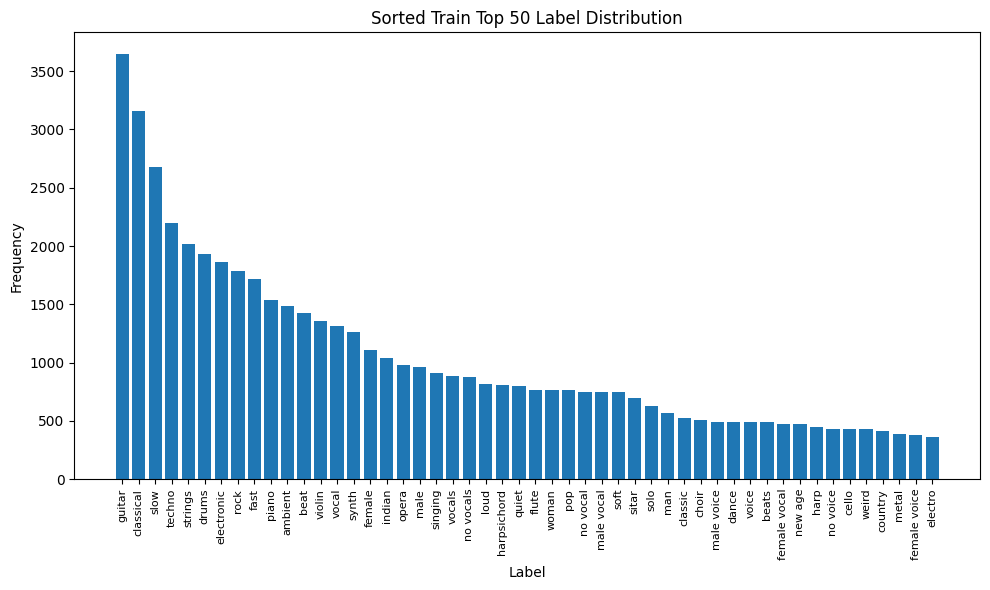

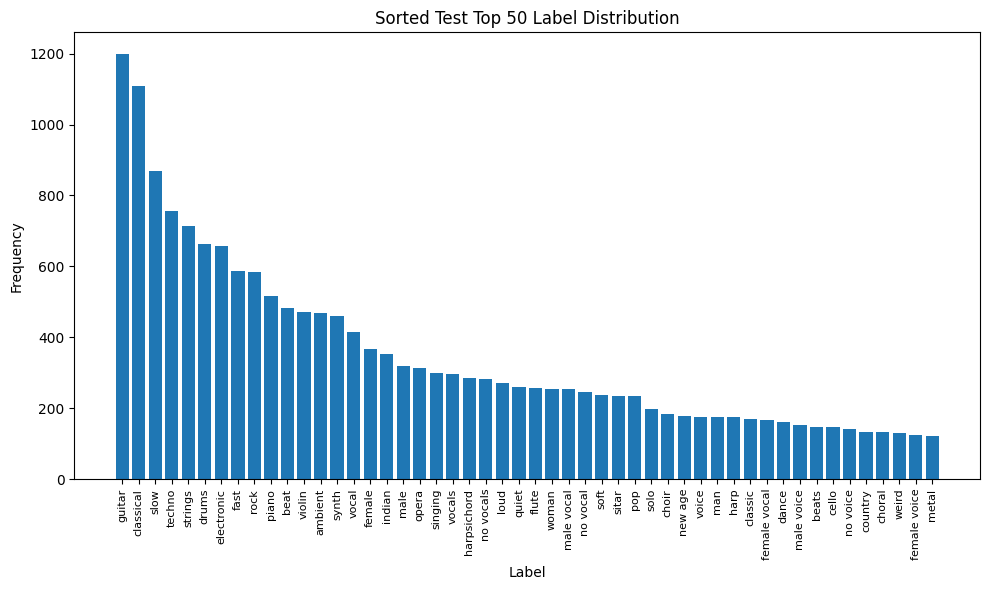

In [7]:
# Get the top 50 label counts and indices
top_n = 50
train_top_n_sorted_counts = train_sorted_counts[:top_n]
train_top_n_sorted_indices = train_sorted_indices[:top_n]
test_top_n_sorted_counts = test_sorted_counts[:top_n]
test_top_n_sorted_indices = test_sorted_indices[:top_n]

# Get the corresponding tag names for the sorted indices
train_top_n_sorted_tag_names = [tag_names[i] for i in train_top_n_sorted_indices]
test_top_n_sorted_tag_names = [tag_names[i] for i in test_top_n_sorted_indices]

# Plot the distribution of the top 50 train and test labels
plot_sorted_label_distribution(train_top_n_sorted_counts, train_top_n_sorted_tag_names, f"Train Top {top_n}")
plot_sorted_label_distribution(test_top_n_sorted_counts, test_top_n_sorted_tag_names, f"Test Top {top_n}")

Determine how many labels appear in both the training and testing sets.

In [8]:
# Compare the top_n labels for the train and test sets
matching_labels = set(train_top_n_sorted_tag_names).intersection(set(test_top_n_sorted_tag_names))
num_matching_labels = len(matching_labels)
print(f"Number of matching top {top_n} labels: {num_matching_labels}")

# Show the non-matching labels (labels that are in train but not in test, and vice versa)
train_not_in_test = set(train_top_n_sorted_tag_names) - set(test_top_n_sorted_tag_names)
test_not_in_train = set(test_top_n_sorted_tag_names) - set(train_top_n_sorted_tag_names)
print(f"Labels in the train set but not in the test set: {train_not_in_test}")
print(f"Labels in the test set but not in the train set: {test_not_in_train}")

Number of matching top 50 labels: 49
Labels in the train set but not in the test set: {'electro'}
Labels in the test set but not in the train set: {'choral'}
